In [228]:
#Tensorflow 설치하기

# 필요한 라이브러리 설치 및 임포트

import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import recall_score as recall
import joblib

In [229]:
#라이브러리 불러오기

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [230]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
submission = pd.read_csv('data/sample_submission.csv')

train.head()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),label
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign


In [231]:
test['url_path_len'].fillna(test['url_len']-test['url_domain_len'],inplace=True)
test['url_domain_len'].fillna(test['url_hostname_len'], inplace= True)

In [232]:
train['url_len']

0       23.0
1       75.0
2       20.0
3       27.0
4       39.0
        ... 
3659    68.0
3660    66.0
3661    90.0
3662    46.0
3663    18.0
Name: url_len, Length: 3664, dtype: float64

In [233]:
train['url_domain_len']

0       15.0
1       17.0
2       16.0
3       14.0
4       27.0
        ... 
3659    52.0
3660    18.0
3661    26.0
3662    13.0
3663    18.0
Name: url_domain_len, Length: 3664, dtype: float64

In [234]:
train['url_hostname_len']

0       15.0
1       17.0
2       16.0
3       14.0
4       27.0
        ... 
3659    52.0
3660    18.0
3661    26.0
3662    13.0
3663    18.0
Name: url_hostname_len, Length: 3664, dtype: float64

In [235]:
train['url_domain_len']

0       15.0
1       17.0
2       16.0
3       14.0
4       27.0
        ... 
3659    52.0
3660    18.0
3661    26.0
3662    13.0
3663    18.0
Name: url_domain_len, Length: 3664, dtype: float64

In [236]:
test.head()

,id,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,...,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet')
0,0,97,0,80.0,17.0,17.0,4,0,0,0,...,0,5.0,0,0,12,1,1,1.0,3.0,0
1,1,37,0,22.0,15.0,15.0,3,1,0,0,...,1,NaN,0,0,158,1,1,NaN,NaN,0
2,2,44,0,24.0,20.0,20.0,3,3,0,0,...,0,6.0,3,3,34,1,1,0.0,136.0,0
3,3,40,0,14.0,26.0,26.0,2,0,0,0,...,0,NaN,0,0,29,1,1,1.0,2.0,0
4,4,43,2,17.0,26.0,26.0,2,0,0,0,...,0,NaN,0,0,41,1,1,NaN,NaN,0


In [237]:
submission.head()

,id,label
0,0,malicious
1,1,benign
2,2,benign
3,3,benign
4,4,benign


In [238]:
train.isnull().sum()

url_len                    0
url_num_hyphens_dom        0
url_path_len               1
url_domain_len             1
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
label                      0
dtype: int64

## train

In [239]:
train['label_binary'] = train['label'].apply(lambda x : 0 if x == 'benign' else 1)

In [240]:
train = train.drop_duplicates(subset = list(df.columns), keep='first')
train

NameError: name 'df' is not defined

In [241]:
train.dropna(inplace=True)

In [242]:
train.isnull().sum()

url_len                    0
url_num_hyphens_dom        0
url_path_len               0
url_domain_len             0
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
label                      0
label_binary               0
dtype: int64

In [243]:
temp = train.corr()
mask = np.zeros_like(temp)
mask[np.triu_indices_from(mask)] = True
mask = np.where(mask == 1, 0, 1)
result = mask * temp
result = result[result != 0]

In [244]:
result.loc['label_binary'].sort_values(ascending = False)

url_hostname_len           0.383235
url_domain_len             0.379331
url_num_hyphens_dom        0.354666
url_query_len              0.188576
url_num_query_para         0.184108
url_entropy                0.165808
html_num_tags('form')      0.122838
html_num_tags('body')      0.111286
html_num_tags('head')      0.024306
url_len                    0.007357
url_port                  -0.011060
html_num_tags('iframe')   -0.021871
url_num_dots              -0.045959
html_num_tags('div')      -0.063515
url_ip_present            -0.078929
url_path_len              -0.100681
html_num_tags('object')   -0.104033
html_num_tags('embed')    -0.107671
html_num_tags('a')        -0.121835
url_num_underscores       -0.128536
html_num_tags('script')   -0.201222
url_chinese_present             NaN
html_num_tags('applet')         NaN
label_binary                    NaN
Name: label_binary, dtype: float64

In [245]:
col_name = list(result.loc['label_binary'].sort_values(ascending = False)[8:15].index)
col_name.append("html_num_tags('applet')")
col_name.append("url_chinese_present")
print(col_name)

["html_num_tags('head')", 'url_len', 'url_port', "html_num_tags('iframe')", 'url_num_dots', "html_num_tags('div')", 'url_ip_present', "html_num_tags('applet')", 'url_chinese_present']


In [246]:
train.drop(col_name, axis=1, inplace=True)

In [247]:
temp = train.corr()
mask = np.zeros_like(temp)
mask[np.triu_indices_from(mask)] = True
mask = np.where(mask == 1, 0, 1)
result = mask * temp
result = result[result != 0]

result.loc['label_binary'].sort_values(ascending = False)

url_hostname_len           0.383235
url_domain_len             0.379331
url_num_hyphens_dom        0.354666
url_query_len              0.188576
url_num_query_para         0.184108
url_entropy                0.165808
html_num_tags('form')      0.122838
html_num_tags('body')      0.111286
url_path_len              -0.100681
html_num_tags('object')   -0.104033
html_num_tags('embed')    -0.107671
html_num_tags('a')        -0.121835
url_num_underscores       -0.128536
html_num_tags('script')   -0.201222
label_binary                    NaN
Name: label_binary, dtype: float64

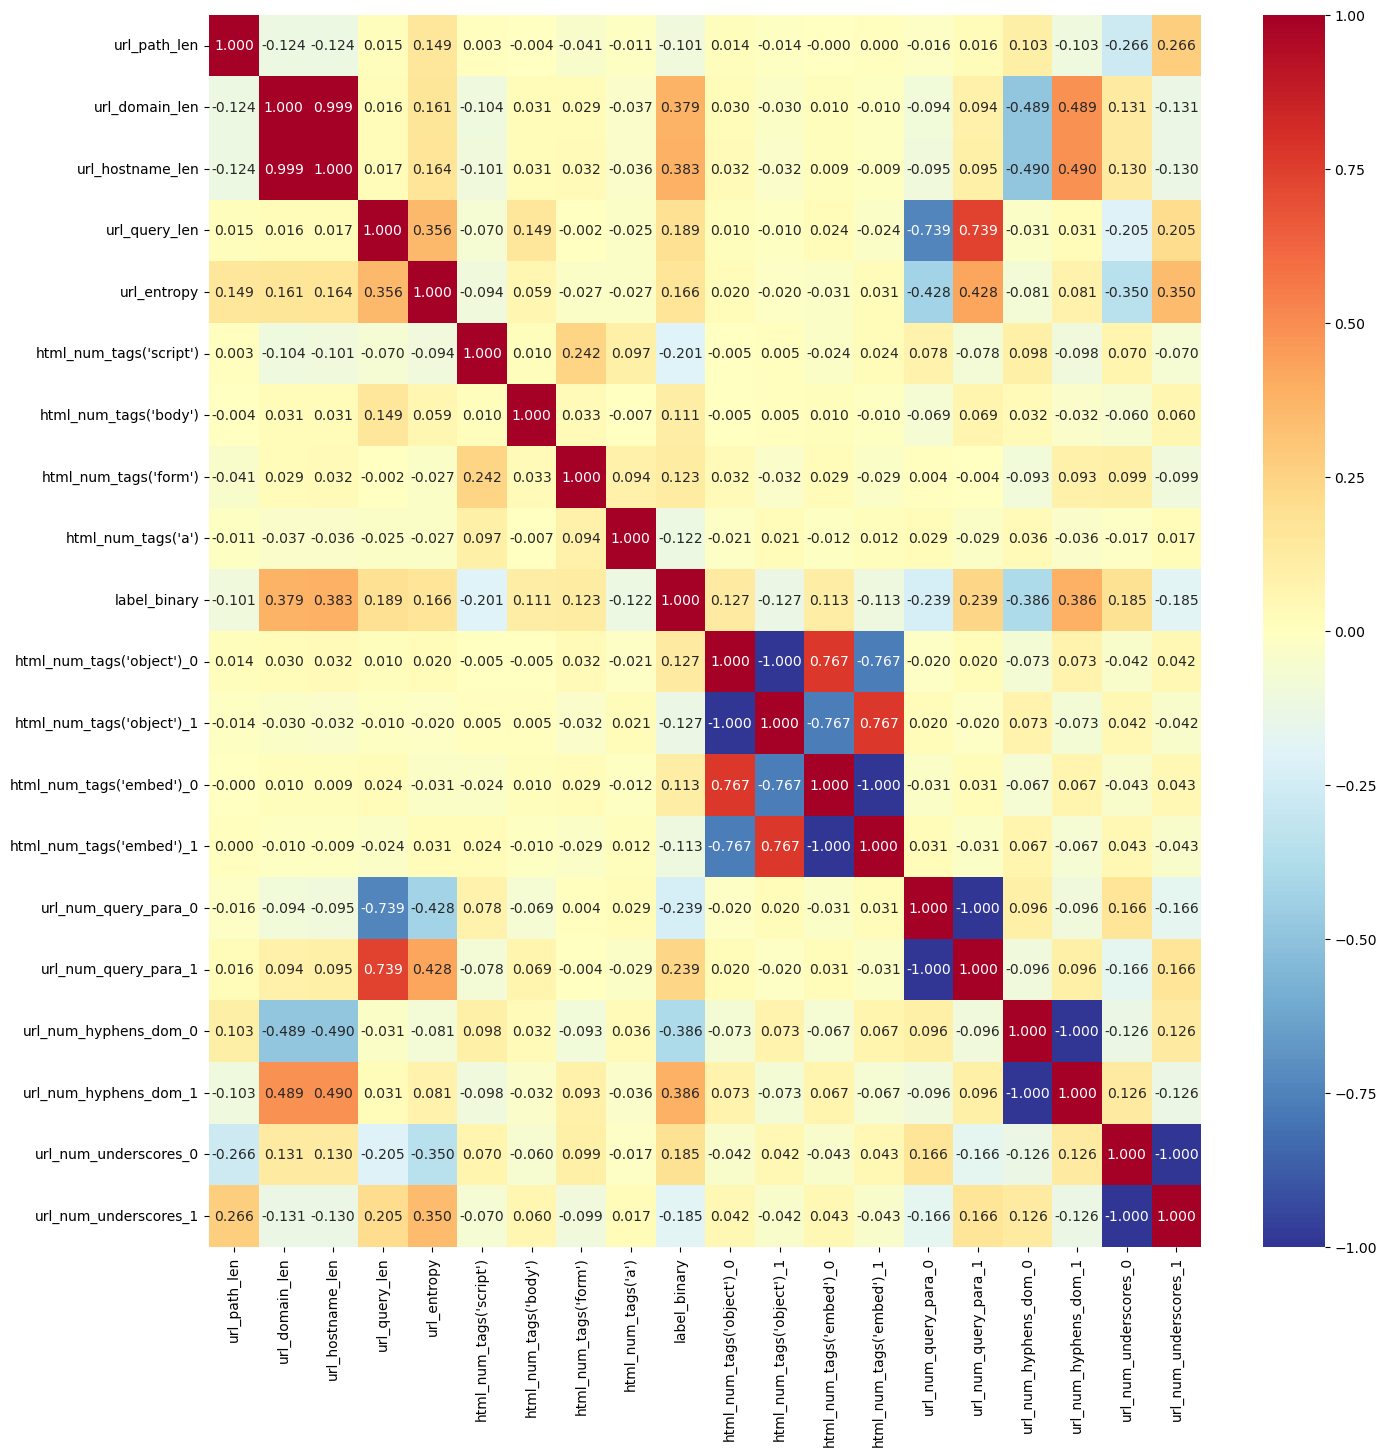

In [277]:
plt.figure(figsize = (16, 16))
sns.heatmap(train.corr(), 
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값값
plt.show()

url_query_len = url_num_query_para          
url_domain_len = url_hostname_len              
url_len = url_path_len

### url_num_hyphens_dom

In [249]:
train.url_num_hyphens_dom.unique()

array([ 0.,  2.,  1.,  3.,  4.,  6.,  5., 14.])

In [250]:
train.url_num_hyphens_dom.value_counts()

0.0     2733
1.0      509
2.0      314
3.0       71
4.0       26
5.0        5
6.0        3
14.0       1
Name: url_num_hyphens_dom, dtype: int64

In [251]:
train[train.url_num_hyphens_dom == 0.0].label_binary.value_counts()

0    1693
1    1040
Name: label_binary, dtype: int64

In [252]:
train[train.url_num_hyphens_dom == 2.0].label_binary.value_counts()

1    265
0     49
Name: label_binary, dtype: int64

### url_num_underscores

In [253]:
train.url_num_underscores.unique()

array([ 0.,  1.,  2.,  3., 11., 12.,  4., 10.,  5.,  6., 14., 18., 15.])

In [254]:
train.url_num_underscores.value_counts()

0.0     3204
1.0      257
2.0       87
3.0       57
4.0       29
6.0        7
14.0       6
5.0        5
12.0       4
10.0       2
18.0       2
11.0       1
15.0       1
Name: url_num_underscores, dtype: int64

In [255]:
train[train.url_num_underscores == 1.0].label_binary.value_counts()

0    184
1     73
Name: label_binary, dtype: int64

In [45]:
train.url_query_len.unique()

array([  0.,  21.,  41.,  36.,  45.,  71.,  11.,  27., 157.,  62., 124.,
        48., 132., 289.,  59.,  70.,  28.,  47., 165.,  44.,  35.,  20.,
        53.,  90., 140., 141.,  51.,   9.,  16., 114.,   5.,  55., 125.,
        13.,  31.,  34., 106., 162., 145.,  98.,  15., 110., 144., 200.,
        37.,  52., 271.,  49., 122., 312.,  42.,  85.,  18., 146., 350.,
        82., 102., 429.,   6.,  57.,  40.,  68.,  94., 173., 208.,  19.,
       185., 248.,  17.,  64.,  56.,  25.,  30.,  81., 156., 111., 120.,
        43.])

### url_num_query_para

In [46]:
train.url_num_query_para.unique()

array([0., 1., 2., 3., 6., 7., 4., 9., 8.])

In [65]:
train.url_num_query_para.value_counts()

0.0    3053
1.0      98
2.0      35
3.0      31
6.0       5
7.0       4
9.0       2
8.0       2
4.0       1
Name: url_num_query_para, dtype: int64

In [46]:
train[train.url_num_query_para == 2.0].label_binary.value_counts()

1    41
Name: label_binary, dtype: int64

### html_num_tags

In [48]:
train["html_num_tags('script')"].unique()

array([  7.,  18.,  33.,  15.,  10.,   4.,   8.,  22.,  17.,   3.,  36.,
        13.,   0.,   2.,  12.,   5.,  24.,  16.,   1.,   6.,  21.,  14.,
        28.,  11.,  42.,  35.,   9.,  43.,  25.,  27., 104.,  23., 108.,
        19.,  53.,  31.,  46.,  26.,  37.,  78.,  29.,  77.,  47.,  87.,
        83.,  38.,  50.,  49.,  20.,  44.,  32.,  45.,  48.,  61.,  39.,
        40.,  30.,  56.,  74.,  34.,  60.,  97., 267.,  41.,  52., 140.,
        65.,  51.,  90.,  98.,  70.,  54.,  69., 129.,  59.,  82., 174.,
        63.])

In [24]:
train["html_num_tags('script')"].value_counts()[:10]

2.0     646
0.0     486
1.0     355
3.0     231
9.0     184
8.0     171
4.0     153
17.0    133
5.0     121
6.0     109
7.0     100
13.0     84
11.0     78
10.0     74
Name: html_num_tags('script'), dtype: int64

In [22]:
test["html_num_tags('script')"].unique()

array([  5.,  nan,   6.,   1.,  25.,   2.,  45.,  17.,  24.,   9.,   7.,
         0.,  21.,  12.,  16.,  13.,   4.,  15.,   8.,   3.,  32.,  65.,
        14.,  11.,  20.,  10.,  33.,  22.,  35.,  68.,  28.,  44.,  27.,
        42.,  30.,  18.,  58.,  23.,  26.,  36.,  19.,  39.,  54.,  47.,
        49.,  63.,  46., 158.,  43.,  71.,  87.,  70.,  31.,  29.,  48.,
        34.,  73.,  38.,  53.,  52.,  88.,  61.,  97.,  37.,  67.])

### embed

In [49]:
train["html_num_tags('embed')"].unique()

array([0., 1., 3.])

In [61]:
train["html_num_tags('embed')"].value_counts()

0.0    3173
1.0      56
3.0       2
Name: html_num_tags('embed'), dtype: int64

In [50]:
train[train["html_num_tags('embed')"] == 0.0].label_binary.value_counts()

1    1802
0    1798
Name: label_binary, dtype: int64

### object

In [214]:
train["html_num_tags('object')"].unique()

array([0., 1., 2., 3., 8., 4., 5.])

In [215]:
train["html_num_tags('object')"].value_counts()

0.0    3577
1.0      76
2.0       5
3.0       1
8.0       1
4.0       1
5.0       1
Name: html_num_tags('object'), dtype: int64

In [216]:
test["html_num_tags('object')"].unique()

array([0, 3, 1, 2, 4, 6], dtype=int64)

In [217]:
train[train["html_num_tags('object')"] == 0.0].label_binary.value_counts()

1    1799
0    1778
Name: label_binary, dtype: int64

In [218]:
train[train["html_num_tags('object')"] == 1.0].label_binary.value_counts()

0    69
1     7
Name: label_binary, dtype: int64

In [219]:
train[train["html_num_tags('object')"] == 2.0].label_binary.value_counts()

0    5
Name: label_binary, dtype: int64

### Body

In [64]:
train["html_num_tags('body')"].unique()

array([1., 2., 0., 3.])

In [20]:
test["html_num_tags('body')"].unique()

array([1, 3, 0, 2], dtype=int64)

In [65]:
train[train["html_num_tags('body')"] == 0.0].label_binary.value_counts()

0    30
1    27
Name: label_binary, dtype: int64

### form

In [57]:
train["html_num_tags('form')"].unique()

array([ 0.,  3.,  1.,  2.,  5.,  9.,  4.,  7., 57., 19.,  8., 11.,  6.,
       10.])

In [19]:
test["html_num_tags('form')"].unique()

array([ 1., nan,  0.,  3.,  4.,  2.,  5., 12., 19.,  6.,  7.])

In [70]:
#train["html_num_tags('a')"].unique()

In [72]:
#train.url_path_len.unique()

In [73]:
train.url_hostname_len.unique()

array([ 15.,  17.,  16.,  14.,  27.,  18.,  19.,  25.,  13.,  23.,  20.,
        12.,  10.,  34.,  24.,  32.,  22.,  30.,  28.,  11.,  26.,  42.,
         9.,  21.,  33.,  43.,   8.,  31.,  44.,   6.,  48.,   7.,  37.,
         4.,  68.,  29.,  36.,  40.,  46., 101.,  39.,  38.,  35.,  61.,
        47.,  45.,  52.,  72.,  55.,  56.,  57., 104.,   5.,  41.,  51.,
        74.,  60.,  49., 109.,  85., 100.,  54.,  62.,  53.,  77.,  63.,
       103.])

In [57]:
train[train["html_num_tags('form')"] == 0.0].label_binary.value_counts()

0    926
1    264
Name: label_binary, dtype: int64

# one-hot

In [260]:
one_feature = ["html_num_tags('object')",
"html_num_tags('embed')",
"url_num_query_para",
"url_num_hyphens_dom",
"url_num_underscores"]

In [261]:
def one_hot(df,ft):
    df[ft] = df[ft].apply(lambda x : 0 if x == 0 else 1)

for i in one_feature:
    print(i)
    one_hot(train,i)

train = pd.get_dummies(train, columns = one_feature)

html_num_tags('object')
html_num_tags('embed')
url_num_query_para
url_num_hyphens_dom
url_num_underscores


In [262]:
for i in one_feature:
    print(i)
    one_hot(test,i)

test = pd.get_dummies(test, columns = one_feature)

html_num_tags('object')
html_num_tags('embed')
url_num_query_para
url_num_hyphens_dom
url_num_underscores


## test

In [263]:
train.columns

Index(['url_path_len', 'url_domain_len', 'url_hostname_len', 'url_query_len',
       'url_entropy', 'html_num_tags('script')', 'html_num_tags('body')',
       'html_num_tags('form')', 'html_num_tags('a')', 'label', 'label_binary',
       'html_num_tags('object')_0', 'html_num_tags('object')_1',
       'html_num_tags('embed')_0', 'html_num_tags('embed')_1',
       'url_num_query_para_0', 'url_num_query_para_1', 'url_num_hyphens_dom_0',
       'url_num_hyphens_dom_1', 'url_num_underscores_0',
       'url_num_underscores_1'],
      dtype='object')

In [264]:
Features_ = ['url_path_len', 'url_domain_len', 'url_hostname_len', 'url_query_len',
       'url_entropy',"html_num_tags('script')", "html_num_tags('body')",
       "html_num_tags('form')", "html_num_tags('a')",
       "html_num_tags('object')_0", "html_num_tags('object')_1",
       "html_num_tags('embed')_0", "html_num_tags('embed')_1",
       'url_num_query_para_0', 'url_num_query_para_1', 'url_num_hyphens_dom_0',
       'url_num_hyphens_dom_1', 'url_num_underscores_0',
       'url_num_underscores_1']

In [265]:
test = test[Features_]

In [266]:
test.isnull().sum()

url_path_len                  86
url_domain_len               101
url_hostname_len             463
url_query_len                  0
url_entropy                    0
html_num_tags('script')      467
html_num_tags('body')          0
html_num_tags('form')        467
html_num_tags('a')           461
html_num_tags('object')_0      0
html_num_tags('object')_1      0
html_num_tags('embed')_0       0
html_num_tags('embed')_1       0
url_num_query_para_0           0
url_num_query_para_1           0
url_num_hyphens_dom_0          0
url_num_hyphens_dom_1          0
url_num_underscores_0          0
url_num_underscores_1          0
dtype: int64

In [267]:
test.url_domain_len

0       17.0
1       15.0
2       20.0
3       26.0
4       26.0
        ... 
2436    17.0
2437    35.0
2438    22.0
2439    14.0
2440    22.0
Name: url_domain_len, Length: 2441, dtype: float64

In [268]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [269]:
test.head()

,url_path_len,url_domain_len,url_hostname_len,url_query_len,url_entropy,html_num_tags('script'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('object')_0,html_num_tags('object')_1,html_num_tags('embed')_0,html_num_tags('embed')_1,url_num_query_para_0,url_num_query_para_1,url_num_hyphens_dom_0,url_num_hyphens_dom_1,url_num_underscores_0,url_num_underscores_1
0,80.0,17.0,17.0,0,4.844913,5.0,1,1.0,3.0,1,0,1,0,1,0,1,0,1,0
1,22.0,15.0,15.0,0,4.246157,NaN,1,NaN,NaN,1,0,1,0,1,0,1,0,0,1
2,24.0,20.0,20.0,0,4.612835,6.0,1,0.0,136.0,0,1,0,1,1,0,1,0,0,1
3,14.0,26.0,26.0,0,4.238521,NaN,1,1.0,2.0,1,0,1,0,1,0,1,0,1,0
4,17.0,26.0,26.0,0,4.240669,NaN,1,NaN,NaN,1,0,1,0,1,0,0,1,1,0


## 결측치 처리

결측치 처리 리스트 

url_path_len,         
url_hostname_len,             
html_num_tags('script'),            
html_num_tags('form'),                
html_num_tags('a')

In [270]:
train

,url_path_len,url_domain_len,url_hostname_len,url_query_len,url_entropy,html_num_tags('script'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),label,...,html_num_tags('object')_0,html_num_tags('object')_1,html_num_tags('embed')_0,html_num_tags('embed')_1,url_num_query_para_0,url_num_query_para_1,url_num_hyphens_dom_0,url_num_hyphens_dom_1,url_num_underscores_0,url_num_underscores_1
0,8.0,15.0,15.0,0.0,4.260333,7.0,1.0,0.0,0.0,malicious,...,1,0,1,0,1,0,1,0,1,0
1,58.0,17.0,17.0,0.0,4.636107,18.0,1.0,0.0,21.0,benign,...,1,0,1,0,1,0,1,0,1,0
2,4.0,16.0,16.0,0.0,3.708966,33.0,1.0,3.0,70.0,benign,...,1,0,1,0,1,0,1,0,1,0
3,13.0,14.0,14.0,0.0,4.025592,15.0,1.0,1.0,55.0,benign,...,1,0,1,0,1,0,1,0,1,0
4,12.0,27.0,27.0,0.0,4.631833,10.0,1.0,0.0,321.0,benign,...,1,0,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3659,16.0,52.0,52.0,0.0,4.135356,0.0,1.0,0.0,3.0,malicious,...,1,0,1,0,1,0,0,1,1,0
3660,48.0,18.0,18.0,0.0,4.362331,14.0,1.0,3.0,475.0,benign,...,1,0,1,0,1,0,1,0,1,0
3661,64.0,26.0,26.0,0.0,4.693343,13.0,1.0,2.0,103.0,malicious,...,1,0,1,0,1,0,0,1,1,0
3662,33.0,13.0,13.0,0.0,4.604166,0.0,1.0,0.0,3.0,benign,...,1,0,1,0,1,0,1,0,1,0


In [271]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
imputed= imputer.fit_transform(train[Features_])

In [272]:
temp_train = pd.DataFrame(imputed, columns=train[Features_].columns)

In [273]:
test_copy = test.copy()
#train_drop = train.drop('ProdTaken', axis=1)
imputer.fit(temp_train)   # 여기서도 data leakage에 조심하자
test = imputer.transform(test)

test = pd.DataFrame(test, columns=test_copy.columns)

In [274]:
test.head()

,url_path_len,url_domain_len,url_hostname_len,url_query_len,url_entropy,html_num_tags('script'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('object')_0,html_num_tags('object')_1,html_num_tags('embed')_0,html_num_tags('embed')_1,url_num_query_para_0,url_num_query_para_1,url_num_hyphens_dom_0,url_num_hyphens_dom_1,url_num_underscores_0,url_num_underscores_1
0,80.0,17.0,17.0,0.0,4.844913,5.000000,1.0,1.000000,3.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,22.0,15.0,15.0,0.0,4.246157,29.000000,1.0,1.333333,268.666667,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,24.0,20.0,20.0,0.0,4.612835,6.000000,1.0,0.000000,136.000000,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3,14.0,26.0,26.0,0.0,4.238521,4.333333,1.0,1.000000,2.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,17.0,26.0,26.0,0.0,4.240669,2.000000,1.0,1.000000,16.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [275]:
test.isnull().sum()

url_path_len                 0
url_domain_len               0
url_hostname_len             0
url_query_len                0
url_entropy                  0
html_num_tags('script')      0
html_num_tags('body')        0
html_num_tags('form')        0
html_num_tags('a')           0
html_num_tags('object')_0    0
html_num_tags('object')_1    0
html_num_tags('embed')_0     0
html_num_tags('embed')_1     0
url_num_query_para_0         0
url_num_query_para_1         0
url_num_hyphens_dom_0        0
url_num_hyphens_dom_1        0
url_num_underscores_0        0
url_num_underscores_1        0
dtype: int64

## 모델링

In [94]:
!pip install catboost

     --------------------------------------- 74.0/74.0 MB 23.4 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB ? eta 0:00:00


In [107]:
from catboost import CatBoostClassifier

In [108]:
train.head()

,url_path_len,url_domain_len,url_hostname_len,url_query_len,url_entropy,html_num_tags('script'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),label,...,html_num_tags('object')_0,html_num_tags('object')_1,html_num_tags('embed')_0,html_num_tags('embed')_1,url_num_query_para_0,url_num_query_para_1,url_num_hyphens_dom_0,url_num_hyphens_dom_1,url_num_underscores_0,url_num_underscores_1
0,8.0,15.0,15.0,0.0,4.260333,7.0,1.0,0.0,0.0,malicious,...,1,0,1,0,1,0,1,0,1,0
1,58.0,17.0,17.0,0.0,4.636107,18.0,1.0,0.0,21.0,benign,...,1,0,1,0,1,0,1,0,1,0
2,4.0,16.0,16.0,0.0,3.708966,33.0,1.0,3.0,70.0,benign,...,1,0,1,0,1,0,1,0,1,0
3,13.0,14.0,14.0,0.0,4.025592,15.0,1.0,1.0,55.0,benign,...,1,0,1,0,1,0,1,0,1,0
4,12.0,27.0,27.0,0.0,4.631833,10.0,1.0,0.0,321.0,benign,...,1,0,1,0,1,0,0,1,1,0


In [109]:
X = train.drop(['label','label_binary'], axis=1)
y = train['label_binary']

In [111]:
from sklearn.utils.class_weight import compute_class_weight

# 불균형한 클래스인 것으로 확인되어 class_weight = 'balanced'로 설정해준다. 
classes = np.unique(y)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y)
class_weights = dict(zip(classes, weights))

In [112]:
from sklearn.model_selection import cross_val_score
cb = CatBoostClassifier(learning_rate= 0.03, max_depth= 10, n_estimators= 1000, class_weights= class_weights,
                     subsample = 0.8, colsample_bylevel=1.0, random_state=42, verbose =0)

# 성능 지표는 정확도(accuracy) , 교차 검증 세트는 5개 
scores = cross_val_score(cb , X, y, scoring='accuracy',cv=5)

print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores),4))

교차 검증별 정확도: [0.9454 0.9523 0.959  0.9536 0.9713]
평균 검증 정확도: 0.9563


In [113]:
cb = CatBoostClassifier(learning_rate= 0.03, max_depth= 10, n_estimators= 1000,
                     subsample = 0.8, colsample_bylevel=1.0, random_state=42, verbose =0)

In [114]:
cb.fit(X, y)

In [115]:
pred = cb.predict(test)

In [116]:
len(pred)

2441

In [117]:
submission['label'] = pred

In [118]:
submission['label'] = submission['label'].apply(lambda x : 'malicious' if x == 1 else 'benign')

In [119]:
submission

,id,label
0,0,benign
1,1,benign
2,2,benign
3,3,malicious
4,4,malicious
...,...,...
2436,2436,benign
2437,2437,malicious
2438,2438,benign
2439,2439,malicious


In [120]:
submission.to_csv('world_submission_3_1.csv', index = False)

## 모델링2

In [122]:
!pip install xgboost

     --------------------------------------- 89.1/89.1 MB 19.2 MB/s eta 0:00:00


In [182]:
import xgboost as xgb 

In [183]:
from sklearn.model_selection import cross_val_score
xg = xgb.XGBClassifier()

# 성능 지표는 정확도(accuracy) , 교차 검증 세트는 5개 
scores = cross_val_score(xg , X, y, scoring='accuracy',cv=5)

print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores),4))

교차 검증별 정확도: [0.9427 0.9386 0.9495 0.9631 0.9645]
평균 검증 정확도: 0.9517


In [278]:
xg.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [185]:
pred = xg.predict(test)

In [186]:
len(pred)

2441

In [187]:
submission['label'] = pred

In [188]:
submission['label'] = submission['label'].apply(lambda x : 'malicious' if x == 1 else 'benign')

In [189]:
submission

,id,label
0,0,benign
1,1,benign
2,2,benign
3,3,malicious
4,4,malicious
...,...,...
2436,2436,benign
2437,2437,malicious
2438,2438,benign
2439,2439,malicious


In [190]:
submission.to_csv('world_submission_3_3.csv', index = False)